### Neural network classification with PyTorch

## Make classification data

In [1]:
import sklearn

In [2]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42)

In [3]:
X, y, len(X), len(y)

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [4]:
# Make DataFrame of circle data
import pandas as pd

circles = pd.DataFrame({"X1": X[:,0],
                        "X2": X[:,1],
                        "label":y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


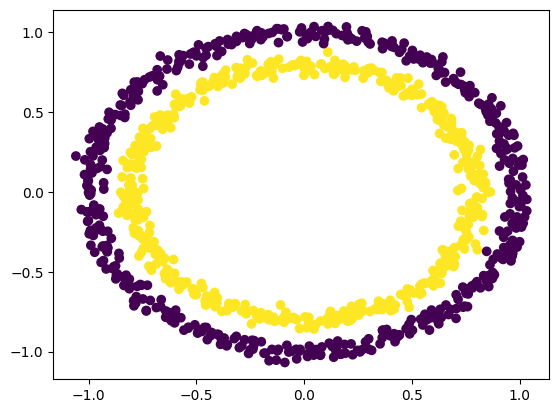

In [5]:
#Visualization
import matplotlib.pyplot as plt

plt.scatter(x=X[:,0],
            y=X[:,1],
            c = y)

## Check input and output shapes

In [6]:
X.shape, y.shape

((1000, 2), (1000,))

### Turn data into tenors and create train and test split

In [7]:
import torch
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y)
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1, 1, 1, 1, 0]))

In [8]:
# splitting the data to training and test set
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)
len(X_train)

800

### Building a model

In [9]:
from torch import nn

#make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [10]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

In [11]:
# Construct a model
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # Create 2 nn.linear layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features = 2, out_features = 5)
    self.layer_2 = nn.Linear(in_features = 5, out_features = 1)

  # define a forward method that outlines the forward path
  def forward(self, x:torch.tensor):
    return self.layer_2(self.layer_1(x)) # x-> layer_1 -> layer_2 -> output

#instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0


CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [12]:
# Replicating above model using nn.sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features = 2, out_features = 5),
    nn.Linear(in_features = 5, out_features = 1)
).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [13]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.4446, -0.0298],
                      [ 0.0966, -0.2743],
                      [ 0.6034,  0.6841],
                      [ 0.3428,  0.5289],
                      [ 0.0359,  0.4207]])),
             ('0.bias', tensor([-0.5071, -0.3116,  0.3027,  0.0452,  0.6823])),
             ('1.weight',
              tensor([[ 0.3660,  0.1129, -0.2528, -0.1320, -0.3838]])),
             ('1.bias', tensor([0.4388]))])

In [14]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
len(untrained_preds), untrained_preds[:5]

(200,
 tensor([[-0.4165],
         [-0.5550],
         [ 0.0408],
         [-0.5465],
         [ 0.1902]]))

In [15]:
# Setup loss function
# loss_fn = nn.BCELoss()requires input to go through sigmoid activation function
loss_fn = nn.BCEWithLogitsLoss() #built in with sigmoid activation function

optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.1)

In [16]:
# Calculate accuracy - out of 100 examples, what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

### Going from raw logits -> prediction probabilities -> prediction labels

In [17]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.4165],
        [-0.5550],
        [ 0.0408],
        [-0.5465],
        [ 0.1902]])

In [18]:
# Use the sigmoid activate function for our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.3973],
        [0.3647],
        [0.5102],
        [0.3667],
        [0.5474]])

In [19]:
torch.round(y_pred_probs)

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.]])

In [20]:
y_test[:5]

tensor([1, 0, 1, 0, 1])

In [21]:
# Combining all together i.e logits -> pred probs -> pred labels
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))))[:5]
y_pred_labels

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.]], grad_fn=<SliceBackward0>)

In [22]:
y_test.dtype

torch.int64

### Building a training and test loop

In [23]:
torch.manual_seed(42)

epochs = 100

for epoch in range(epochs):

  # Training
  model_0.train()

  # Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels

  # Calculate the loss/accuracy
  loss = loss_fn(y_logits,
                 y_train.type(torch.float))
  acc = accuracy_fn(y_true = y_train,
                         y_pred = y_pred)

  # Optimizer zero grad
  optimizer.zero_grad()

  # Back propagation
  loss.backward()

  # Optimizer step
  optimizer.step()

  # Testing
  model_0.eval()

  with torch.inference_mode():
    # Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # Calculate the loss/accuracy
    test_loss = loss_fn(test_logits, y_test.type(torch.float))
    test_acc = accuracy_fn(y_true = y_test,
                           y_pred = test_pred)

  # Print out whats happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.2f}, Test acc: {test_acc:.2f}%")



Epoch: 0 | Loss: 0.70751, Acc: 48.12% | Test loss: 0.70, Test acc: 51.00%
Epoch: 10 | Loss: 0.70239, Acc: 48.25% | Test loss: 0.69, Test acc: 52.00%
Epoch: 20 | Loss: 0.69990, Acc: 48.75% | Test loss: 0.69, Test acc: 53.50%
Epoch: 30 | Loss: 0.69843, Acc: 49.50% | Test loss: 0.69, Test acc: 53.00%
Epoch: 40 | Loss: 0.69745, Acc: 49.88% | Test loss: 0.69, Test acc: 53.00%
Epoch: 50 | Loss: 0.69673, Acc: 49.88% | Test loss: 0.69, Test acc: 50.00%
Epoch: 60 | Loss: 0.69619, Acc: 50.38% | Test loss: 0.69, Test acc: 51.50%
Epoch: 70 | Loss: 0.69576, Acc: 49.75% | Test loss: 0.69, Test acc: 51.00%
Epoch: 80 | Loss: 0.69543, Acc: 50.25% | Test loss: 0.69, Test acc: 50.50%
Epoch: 90 | Loss: 0.69515, Acc: 50.75% | Test loss: 0.69, Test acc: 48.50%


## Building a model with non-linearity

In [24]:
# Build a model with non-linear activation functions
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features = 10, out_features=1)
    self.relu = nn.ReLU() # relu is a non linear activation function

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

In [25]:
model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [26]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params = model_3.parameters(),
                            lr = 0.1)

In [27]:
# Building a training and testing loop
torch.manual_seed(42)

epochs = 10000
for epoch in range(epochs):
  # Training mode
  model_3.train()

  # Forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels

  # Calculate the loss
  loss = loss_fn(y_logits, y_train.type(torch.float))

  # Optimize zero grad
  optimizer.zero_grad()

  # Backward loss
  loss.backward()

  # Optimizer step
  optimizer.step()

  # Testing loop
  model_3.eval()

  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # Loss calculation
    test_loss = loss_fn(test_logits, y_test.type(torch.float))

  if epoch % 1000 == 0:
    print(f"Epoch: {epoch} | Trainint loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Trainint loss: 0.6929463148117065 | Test loss: 0.6931881904602051
Epoch: 100 | Trainint loss: 0.6911528706550598 | Test loss: 0.6910240054130554
Epoch: 200 | Trainint loss: 0.6897743940353394 | Test loss: 0.6893961429595947
Epoch: 300 | Trainint loss: 0.687949538230896 | Test loss: 0.6872316598892212
Epoch: 400 | Trainint loss: 0.6851678490638733 | Test loss: 0.684114933013916
Epoch: 500 | Trainint loss: 0.6810224652290344 | Test loss: 0.6794120669364929
Epoch: 600 | Trainint loss: 0.675148606300354 | Test loss: 0.6728507280349731
Epoch: 700 | Trainint loss: 0.6665886044502258 | Test loss: 0.6632164716720581
Epoch: 800 | Trainint loss: 0.6515955328941345 | Test loss: 0.647568941116333
Epoch: 900 | Trainint loss: 0.6236233711242676 | Test loss: 0.6214525699615479
Epoch: 1000 | Trainint loss: 0.5681842565536499 | Test loss: 0.5737816095352173
Epoch: 1100 | Trainint loss: 0.4815295338630676 | Test loss: 0.4993472993373871
Epoch: 1200 | Trainint loss: 0.3705616891384125 | Test l

## Putting it all together with a multi-class classification problem

* Bimary Classification = one thing or another
* Multi-class classification = more than one thing or another

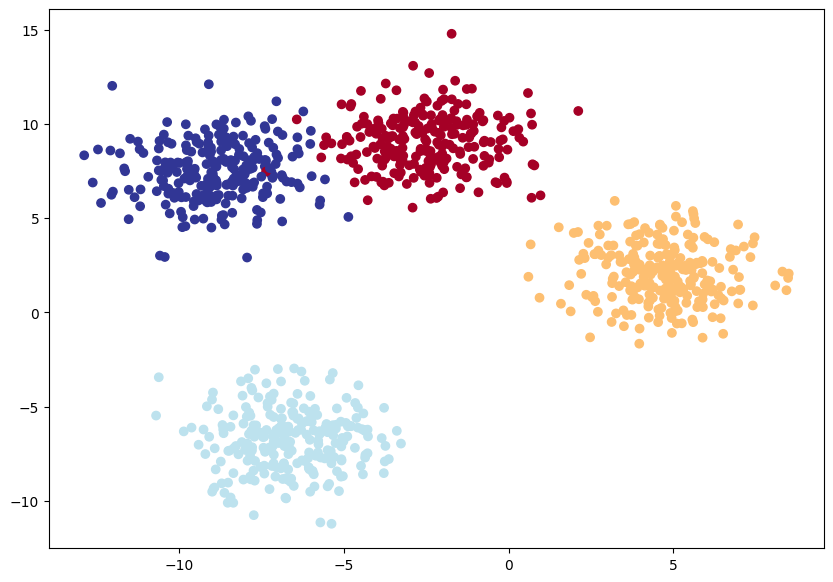

In [28]:
## Creating a toy multi-class dataset
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# Cerate multi-class data
X_blob, y_blob = make_blobs(n_samples = 1000,
                            n_features = NUM_FEATURES,
                            centers = NUM_CLASSES,
                            cluster_std = 1.5, # give the cluters a little shake up
                            random_state = RANDOM_SEED)

# turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.float)

# Split the data into train-test split
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                    y_blob,
                                                    test_size = 0.2,
                                                    random_state = RANDOM_SEED)

# Plot data
plt.figure(figsize = (10,7))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap = plt.cm.RdYlBu)

## Building a multi-class classification model in PyTorch

In [29]:
# create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [30]:
# Build a multi-class classification model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units = 8):
    """Initializes multi-class classification model.

    Args:
      input_features (int): Number of input features to the model
      output_features (int): Number of output featurs (umber of output classes)
      hidden_units (int): Number of hidden units between layers, default 8

    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features = input_features, out_features = hidden_units),
        # nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = hidden_units),
        # nn.ReLU()
        nn.Linear(in_features = hidden_units, out_features = output_features)
    )
  def forward(self, x):
    return self.linear_layer_stack(x)
# Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features = 2,
                    output_features = 4,
                    hidden_units = 8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [33]:
# creating a loss funstion for multi-class classification
loss_fn = nn.CrossEntropyLoss()

# Create an optimizer for multi-class classification
optimizer = torch.optim.SGD(params = model_4.parameters(),
                            lr = 0.1) # learning rate is a hyperparameter you can change

Logits (raw outputs of the model) -> pred probs (use `torch.softmax`) -> Pred labels (take the argmax of the prediction probabilities)

In [40]:
y_logits = model_4(X_blob_train)
y_pred = torch.softmax(y_logits, dim = 1) # here dimension is either row-wise(1) or column-wise(0)
y_logits, y_pred

(tensor([[-1.2711, -0.6494, -1.4740, -0.7044],
         [ 0.2210, -1.5439,  0.0420,  1.1531],
         [ 2.8698,  0.9143,  3.3169,  1.4027],
         ...,
         [-0.0148, -1.5722, -0.2221,  0.9874],
         [ 2.3231,  0.6656,  2.6783,  1.1564],
         [ 2.1249, -0.9140,  2.2318,  2.1890]], grad_fn=<AddmmBackward0>),
 tensor([[0.1838, 0.3422, 0.1500, 0.3239],
         [0.2199, 0.0377, 0.1839, 0.5586],
         [0.3406, 0.0482, 0.5326, 0.0785],
         ...,
         [0.2106, 0.0444, 0.1712, 0.5738],
         [0.3415, 0.0651, 0.4871, 0.1063],
         [0.3099, 0.0148, 0.3449, 0.3304]], grad_fn=<SoftmaxBackward0>))

In [42]:
y_blob_train.dtype

torch.float32

In [48]:
# Building training and testing loop
torch.manual_seed(RANDOM_SEED)

epochs = 10000

for epoch in range(epochs):
  # Training loop
  model_4.train()

  # Forward pass
  y_blob_logits = model_4(X_blob_train)
  y_blob_pred = torch.softmax(y_blob_logits, dim = 1).argmax(dim=1) # Logits (raw outputs of the model) -> pred probs (use torch.softmax) -> Pred labels (take the argmax of the prediction probabilities)

  # Calculate the loss
  loss = loss_fn(y_blob_logits, y_blob_train.type(torch.long))

  # Optimizer zero grad
  optimizer.zero_grad()

  # Backward loss
  loss.backward()

  # Optimizer step
  optimizer.step()

  # Testing loop
  model_4.eval()
  with torch.inference_mode():

    # forward pass
    test_blob_logits = model_4(X_blob_test)
    test_blob_pred = torch.softmax(test_blob_logits, dim=1).argmax(dim = 1)

    # Calculate the loss
    test_loss = loss_fn(test_blob_logits, y_blob_test.type(torch.long))

  # print out what's happening
  if epoch % 1000 == 0:
    print(f"Epoch: {epoch} | Training loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Training loss: 0.023017508909106255 | Test loss: 0.011330136097967625
Epoch: 1000 | Training loss: 0.021285831928253174 | Test loss: 0.0095179108902812
Epoch: 2000 | Training loss: 0.020041335374116898 | Test loss: 0.00825812853872776
Epoch: 3000 | Training loss: 0.01906880922615528 | Test loss: 0.007201310247182846
Epoch: 4000 | Training loss: 0.018316254019737244 | Test loss: 0.006288937292993069
Epoch: 5000 | Training loss: 0.017788169905543327 | Test loss: 0.005537551827728748
Epoch: 6000 | Training loss: 0.017470451071858406 | Test loss: 0.004972041118890047
Epoch: 7000 | Training loss: 0.01730157807469368 | Test loss: 0.004586583003401756
Epoch: 8000 | Training loss: 0.017213020473718643 | Test loss: 0.0043436381965875626
Epoch: 9000 | Training loss: 0.017161842435598373 | Test loss: 0.004197217989712954


In [51]:
# Make predictions
model_4.eval()

with torch.inference_mode():
  y_logits = model_4(X_blob_test)

y_logits[:10]

tensor([[  8.1773,  30.2887, -30.7644, -20.3181],
        [ 15.9746, -38.6615,   7.4349,  24.1969],
        [ -9.0868, -12.5605,  25.3795,   6.9591],
        [  2.9591,  28.9951, -22.1853, -19.5768],
        [ 19.0806,  -1.4312, -23.9140,   0.2885],
        [ 18.1457, -49.0029,  11.6960,  30.8909],
        [-10.8805,  -2.0284,  20.4279,   0.1489],
        [ 17.8068, -10.7354, -15.3504,   6.2547],
        [ -7.6457, -28.2815,  34.5825,  17.1028],
        [ 17.9712,  -6.9810, -18.2936,   3.8412]])

In [54]:
# go from y_logits -> prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim =1)
y_pred_probs[:10]

tensor([[2.4955e-10, 1.0000e+00, 3.0549e-27, 1.0514e-22],
        [2.6853e-04, 5.0212e-28, 5.2511e-08, 9.9973e-01],
        [1.0752e-15, 3.3331e-17, 1.0000e+00, 1.0003e-08],
        [4.9282e-12, 1.0000e+00, 5.9244e-23, 8.0444e-22],
        [1.0000e+00, 1.2355e-09, 2.1266e-19, 6.8981e-09],
        [2.9164e-06, 2.0071e-35, 4.6109e-09, 1.0000e+00],
        [2.5290e-14, 1.7676e-10, 1.0000e+00, 1.5595e-09],
        [9.9999e-01, 4.0206e-13, 3.9812e-15, 9.6163e-06],
        [4.5764e-19, 4.9947e-28, 1.0000e+00, 2.5625e-08],
        [1.0000e+00, 1.4569e-11, 1.7801e-16, 7.3017e-07]])

In [56]:
# go from pred probs -> prediction labels
y_pred = torch.argmax(y_pred_probs, dim = 1)
y_pred

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

In [57]:
y_blob_test

tensor([1., 3., 2., 1., 0., 3., 2., 0., 2., 0., 0., 1., 0., 0., 0., 3., 3., 2.,
        3., 3., 3., 0., 1., 2., 2., 2., 3., 0., 1., 0., 3., 1., 1., 3., 1., 2.,
        1., 3., 0., 2., 0., 3., 3., 2., 0., 3., 1., 1., 0., 3., 1., 0., 1., 1.,
        3., 2., 1., 1., 3., 2., 2., 0., 3., 2., 2., 0., 0., 3., 3., 0., 0., 3.,
        3., 3., 2., 3., 3., 3., 3., 1., 0., 2., 3., 2., 3., 3., 2., 3., 3., 2.,
        3., 3., 1., 3., 3., 3., 1., 0., 3., 2., 0., 0., 3., 0., 2., 3., 1., 0.,
        3., 2., 1., 1., 0., 2., 2., 3., 0., 0., 1., 2., 2., 3., 0., 1., 2., 0.,
        0., 0., 2., 3., 1., 2., 3., 2., 0., 3., 0., 0., 1., 1., 1., 0., 2., 2.,
        2., 2., 0., 3., 3., 2., 2., 1., 3., 2., 0., 0., 3., 3., 2., 1., 2., 0.,
        3., 2., 0., 3., 2., 0., 2., 2., 2., 0., 3., 1., 1., 1., 1., 1., 3., 1.,
        0., 2., 2., 1., 2., 2., 0., 1., 2., 2., 0., 0., 1., 3., 2., 0., 3., 1.,
        2., 1.])

In [59]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

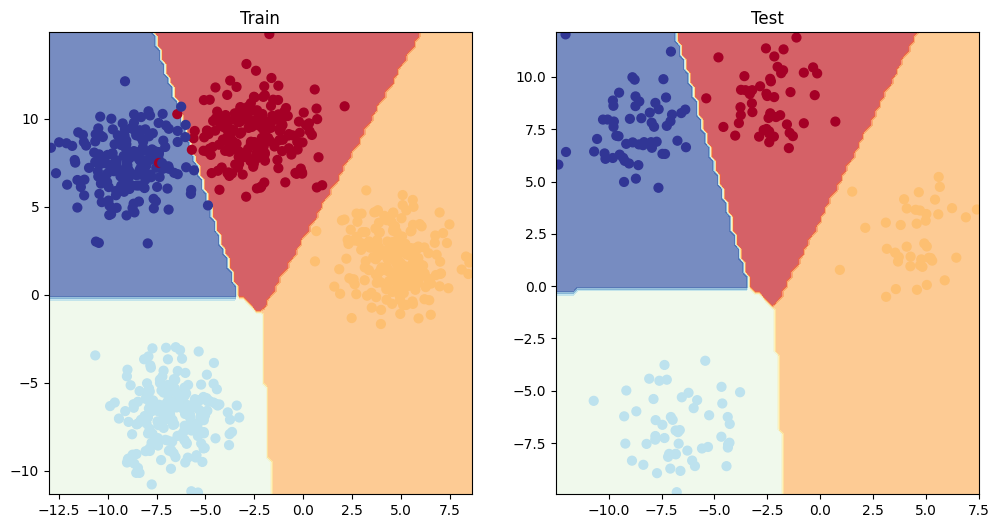

In [63]:
plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)